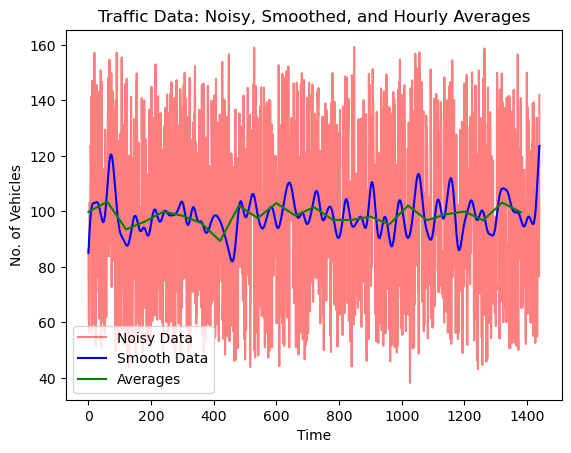

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

traffic_data = np.random.randint(50, 150, size=1440) 
noise = np.random.normal(0, 5, 1440) 
traffic_noise_data = traffic_data + noise 

# print(traffic_noise_data)

b, a = signal.butter(3, 0.05)  
traffic_smooth = signal.filtfilt(b, a, traffic_noise_data)

# print(b)
# print(a)

avg = np.mean(traffic_smooth.reshape(24, 60), axis=1)

# print(avg)




x1 = np.arange(1440)
y1 = traffic_noise_data
plt.plot(x1,y1,label='Noisy Data', color = 'red', alpha = 0.5)

x2 = np.arange(1440)
y2 = traffic_smooth
plt.plot(x2,y2,label='Smooth Data', color = 'blue')



x3 = np.arange(0,1440,60)
y3 = avg
plt.plot(x3,y3,label='Averages', color='green')


plt.title('Traffic Data: Noisy, Smoothed, and Hourly Averages')
plt.xlabel('Time')
plt.ylabel('No. of Vehicles')

plt.legend()
plt.show()


def findInterval():
    s = []
    a = -1
    b = -1
    cnt = 0
    for i in range(0,1440):
        if traffic_smooth[i]>=100:
            cnt += 1
            if cnt==1:
                a = i
        else:
            if cnt>=20:
                b = i
                s.append(a)
                s.append(b)
            cnt= 0

#     print("Required intervals are :-")
#     for i in range(0,len(s),2):
#         print(s[i],"->",s[i+1])

    x1 = np.arange(1440)
    y1 = traffic_smooth
    plt.plot(x1,y1,label='Complete Interval', color = 'blue')
    
    x3 = np.arange(0,1440)
    y3 = np.random.randint(100,101,1440)
    plt.plot(x3,y3)
    
    for i in range(0,len(s),2):
        x2 = np.arange(s[i],s[i+1])
        y2 = traffic_smooth[s[i]:s[i+1]]
        plt.scatter(x2,y2,label='Selected Interval', color='red')
        plt.plot(x2,y2)
    
    
# findInterval()










